- doe-efficiency
    - x축
        - 100~1000개 trainset
    - y축
        - MAPE 성능  

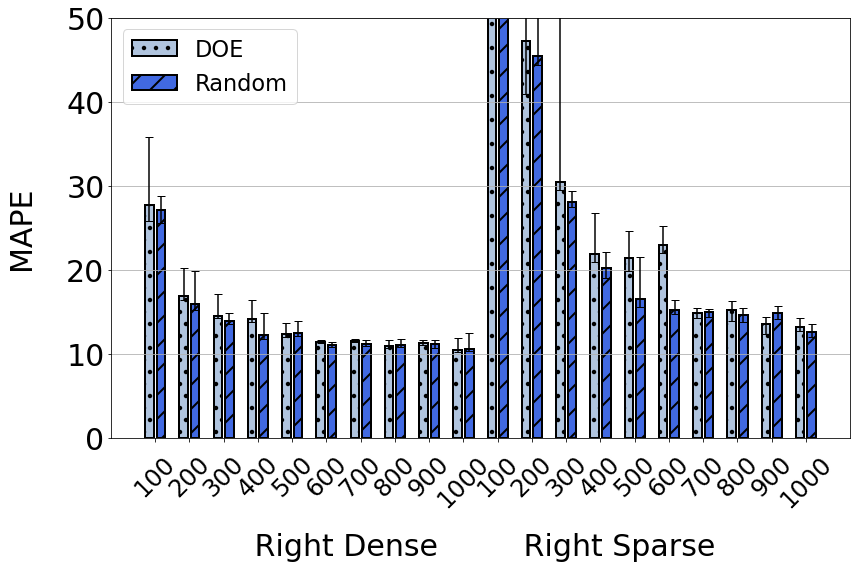

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# x 축 label
x_label = ["100", "200", "300", "400", "500", "600", "700", "800", "900", "1000", 
          "100", "200", "300", "400", "500", "600", "700", "800", "900", "1000"]

# DOE MAPE (sp_smdm , bz_smsm)
doe = [27.75, 16.88, 14.55, 14.19, 12.36, 11.46, 11.49, 10.89, 11.32, 10.49, 
      90.88, 47.29, 30.50, 21.86, 21.45, 22.92, 14.84, 15.25, 13.61, 13.25]
doe_min = [25.83, 16.45, 14.23, 13.76, 12.04, 11.28, 11.39, 10.74, 11.06, 10.27, 
          71.71, 40.99, 29.50, 20.88, 19.83, 22.02, 14.28, 13.95, 12.42, 12.77]
doe_max = [35.84, 20.23, 17.16, 16.41, 13.66, 11.59, 11.77, 11.66, 11.69, 11.85, 
          100.85, 80.53, 72.42, 26.83, 24.68, 25.24, 15.41, 16.33, 14.36, 14.31]
df = pd.DataFrame({'x_label':x_label,'doe':doe, 'doe_min': doe_min, 'doe_max': doe_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.doe - df.doe_min
df['maxgap'] = df.doe_max - df.doe
doe_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# Random MAPE (sp_smdm, bz_smsm)
random = [27.14, 15.93, 13.92, 12.28, 12.44, 11.09, 11.21, 11.09, 11.17, 10.57, 
          81.31, 45.49, 28.10, 20.22, 16.52, 15.27, 14.94, 14.65, 14.91, 12.56]
random_min = [25.61, 15.18, 13.56, 11.79, 12.14, 10.81, 10.99, 10.83, 10.67, 10.38, 
              72.64, 44.44, 27.45, 19.07, 15.63, 14.74, 14.41, 13.77, 14.14, 12.00]
random_max = [28.80, 19.91, 14.86, 14.81, 13.95, 11.37, 11.69, 11.79, 11.64, 12.45, 
              96.12,  78.13, 29.38, 22.18, 21.52, 16.36, 15.32, 15.51, 15.64, 13.57]
df = pd.DataFrame({'x_label':x_label,'random':random, 'random_min': random_min, 'random_max': random_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.random - df.random_min
df['maxgap'] = df.random_max - df.random
random_yerr = df[['mingap', 'maxgap']].T.to_numpy()

################################# x축 및 전체 figure 설정 ####################################################

fontsize = 30

plt.rc('axes', labelsize=fontsize)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=fontsize*0.8)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=fontsize)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=fontsize*0.75)  # 범례 폰트 크기
plt.rcParams['hatch.linewidth'] = 2 # bar pattern 두께

x = np.arange(len(x_label)) # x축 인덱스
width = 0.25 # bar 넓이

fig, ax1 = plt.subplots(figsize=(12,8)) # figure 및 subplot 선언

# 각 bar 의 중심 지정
bar1 = ax1.bar(x - 0.17, doe, width, linewidth=2, edgecolor='black', yerr=doe_yerr, hatch='.', label='DOE', color='lightsteelblue', capsize=4)
bar2 = ax1.bar(x + 0.17, random, width, linewidth=2, edgecolor='black', yerr=random_yerr, hatch='/', label='Random', color='royalblue', capsize=4)

################################# ax1 ####################################################

ax1.set_xticks(x) # x축 인덱스
ax1.set_xticklabels(x_label, rotation=45) # x축 label 이름
ax1.tick_params(axis='x',pad=10) # x축 label pad

ax1.yaxis.grid(True) # y축만 grid 사용
ax1.set_ylim([0, 50])  # 좌측 y축 범위 설정
# ax1.set_yticks([0, 10, 20, 30, 40]) # y축 index 설정

ax1.set_xlabel(' Right Dense         Right Sparse', labelpad=20) # ax1 ylabel 설정
ax1.set_ylabel('MAPE', labelpad=30) # ax1 ylabel 설정

ax1.legend(loc="upper left") # 범례 표시

# 이미지 저장시, figure 크기에 맞게 이미지 저장
fig.tight_layout()
fig.savefig('./doe-efficiency.png')
plt.show()

In [1]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # x 축 label
# x_label = ["sp_smdm", "bz_smsm"]

# # dnn 모델의 default hyper-parameter 성능
# dnn_default = [37.49, 73.20]
# dnn_default_min = [37.49, 73.20]
# dnn_default_max = [37.49, 73.20]
# df = pd.DataFrame({'x_label':x_label,'dnn_default':dnn_default, 'dnn_default_min': dnn_default_min, 'dnn_default_max': dnn_default_max}) 

# # 평균과 최소, 최대 간의 차이
# df['mingap'] = df.dnn_default - df.dnn_default_min
# df['maxgap'] = df.dnn_default_max - df.dnn_default
# dnn_default_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# # dnn 모델의 grid search hyper-parameter 성능
# dnn_grid = [12.12, 12.64]
# dnn_grid_min = [12.12, 12.64]
# dnn_grid_max = [12.12, 12.64]
# df = pd.DataFrame({'x_label':x_label,'dnn_grid':dnn_grid, 'dnn_grid_min': dnn_grid_min, 'dnn_grid_max': dnn_grid_max}) 

# # 평균과 최소, 최대 간의 차이
# df['mingap'] = df.dnn_grid - df.dnn_grid_min
# df['maxgap'] = df.dnn_grid_max - df.dnn_grid
# dnn_grid_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# # xgbregressor 모델의 default hyper-parameter 성능
# xgbregressor_default = [20.23, 27.67]
# xgbregressor_default_min = [20.23, 27.67]
# xgbregressor_default_max = [20.23, 27.67]
# df = pd.DataFrame({'x_label':x_label,'xgbregressor_default':xgbregressor_default, 'xgbregressor_default_min': xgbregressor_default_min, 'xgbregressor_default_max': xgbregressor_default_max}) 

# # 평균과 최소, 최대 간의 차이
# df['mingap'] = df.xgbregressor_default - df.xgbregressor_default_min
# df['maxgap'] = df.xgbregressor_default_max - df.xgbregressor_default
# xgbregressor_default_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# # xgbregressor 모델의 BO hyper-parameter 성능
# xgbregressor_bo = [15.99, 23.01]
# xgbregressor_bo_min = [15.99, 23.01]
# xgbregressor_bo_max = [15.99, 23.01]
# df = pd.DataFrame({'x_label':x_label,'xgbregressor_bo':xgbregressor_bo, 'xgbregressor_bo_min': xgbregressor_bo_min, 'xgbregressor_bo_max': xgbregressor_bo_max}) 

# # 평균과 최소, 최대 간의 차이
# df['mingap'] = df.xgbregressor_bo - df.xgbregressor_bo_min
# df['maxgap'] = df.xgbregressor_bo_max - df.xgbregressor_bo
# xgbregressor_bo_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# # # NNLS 모델의 성능
# # nnls_default = [252, 280]
# # nnls_default_min = [252, 280]
# # nnls_default_max = [252, 280]
# # df = pd.DataFrame({'x_label':x_label,'nnls_default':nnls_default, 'nnls_default_min': nnls_default_min, 'nnls_default_max': nnls_default_max}) 

# # # 평균과 최소, 최대 간의 차이
# # df['mingap'] = df.nnls_default - df.nnls_default_min
# # df['maxgap'] = df.nnls_default_max - df.nnls_default
# # nnls_default_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# # # polynomial 모델의 성능
# # poly_default = [49.53, 86.88]
# # poly_default_min = [49.53, 86.88]
# # poly_default_max = [49.53, 86.88]
# # df = pd.DataFrame({'x_label':x_label,'poly_default':poly_default, 'poly_default_min': poly_default_min, 'poly_default_max': poly_default_max}) 

# # # 평균과 최소, 최대 간의 차이
# # df['mingap'] = df.poly_default - df.poly_default_min
# # df['maxgap'] = df.poly_default_max - df.poly_default
# # poly_default_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# ################################# x축 및 전체 figure 설정 ####################################################

# fontsize = 40

# plt.rc('axes', labelsize=fontsize)   # x,y축 label 폰트 크기
# plt.rc('xtick', labelsize=fontsize)  # x축 눈금 폰트 크기 
# plt.rc('ytick', labelsize=fontsize)  # y축 눈금 폰트 크기
# plt.rc('legend', fontsize=fontsize*0.45)  # 범례 폰트 크기
# plt.rcParams['hatch.linewidth'] = 2 # bar pattern 두께

# x = np.arange(len(x_label)) # x축 인덱스
# width = 0.2 # bar 넓이

# fig, ax1 = plt.subplots(figsize=(12,8)) # figure 및 subplot 선언

# # 각 bar 의 중심 지정
# bar1 = ax1.bar(x - 0.3, dnn_default, width, linewidth=2, edgecolor='black', yerr=dnn_default_yerr, hatch='.', label='DNN Default', color='lightsteelblue', capsize=20)
# bar2 = ax1.bar(x - 0.1, xgbregressor_default, width, linewidth=2, edgecolor='black', yerr=xgbregressor_default_yerr, hatch='/', label='XGBoost Default', color='royalblue', capsize=20)
# bar3 = ax1.bar(x + 0.1, xgbregressor_bo, width, linewidth=2, edgecolor='black', yerr=xgbregressor_bo_yerr, hatch='/', label='XGBoost BO', color='royalblue', capsize=20)
# bar4 = ax1.bar(x + 0.3, dnn_grid, width, linewidth=2, edgecolor='black', yerr=dnn_grid_yerr, hatch='.', label='DNN GridSearch', color='lightsteelblue', capsize=20)

# ################################# ax1 ####################################################

# ax1.set_xticks(x) # x축 인덱스
# ax1.set_xticklabels(x_label) # x축 label 이름
# ax1.tick_params(axis='x',pad=10) # x축 label pad

# ax1.yaxis.grid(True) # y축만 grid 사용
# ax1.set_ylim([0, 80])  # 좌측 y축 범위 설정
# ax1.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80]) # y축 index 설정

# ax1.set_xlabel('Multiplication Method', labelpad=20) # ax1 ylabel 설정
# ax1.set_ylabel('MAPE', labelpad=30) # ax1 ylabel 설정

# #ax1.set_title('spmm sparse dense diff', pad=40) # ax1 title 설정
# ax1.legend(loc="upper right") # 범례 표시
# # 범례 글씨 크기 줄이기

# # 이미지 저장시, figure 크기에 맞게 이미지 저장
# fig.tight_layout()
# fig.savefig('./efficiency-of-hyperparameter-optimization.png')
# plt.show()